
Credit Card Fraud Detection (Classification) :
- Logistic Regression
- Random Forest 
- XGBClassifier






**Dataset Information**

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [74]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,247578.000000,247578.000000,247578.000000,247578.000000,247578.000000,247578.000000,247578.000000,247578.000000,247578.000000,247578.000000,...,247578.000000,247578.000000,247578.000000,247578.000000,247578.000000,247578.000000,247578.000000,247577.000000,247577.000000,247577.000000
mean,84652.274855,-0.040734,-0.019573,0.107929,0.027314,-0.040027,0.019740,-0.016630,0.001798,0.000873,...,-0.002254,-0.012171,-0.006724,0.000734,0.022985,0.001715,-0.000808,0.000880,90.897454,0.001814
std,42427.842322,1.960922,1.670691,1.506646,1.414907,1.375974,1.325830,1.227902,1.197595,1.113476,...,0.740356,0.715939,0.638959,0.606388,0.514700,0.485673,0.402117,0.333853,252.131266,0.042548
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,50035.250000,-0.938183,-0.608151,-0.704349,-0.835277,-0.729429,-0.746442,-0.564728,-0.201301,-0.656248,...,-0.225497,-0.533958,-0.165291,-0.350396,-0.290147,-0.330159,-0.070531,-0.050265,6.000000,0.000000
50%,77066.000000,-0.006356,0.061254,0.300317,0.017218,-0.097728,-0.249466,0.020178,0.029213,-0.059814,...,-0.031620,-0.002316,-0.018643,0.045379,0.054487,-0.058995,0.002398,0.014099,23.200000,0.000000
75%,126774.000000,1.261805,0.781246,1.106110,0.799109,0.563616,0.422144,0.546143,0.330289,0.607703,...,0.176705,0.495830,0.135080,0.431525,0.365981,0.248513,0.089004,0.077728,79.950000,0.000000
max,153623.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Processing the Data**


In [ ]:
#check the null values 
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
np.where(df['Class'].isnull())[0]


array([], dtype=int64)

In [ ]:
df['Class'].fillna( method ='ffill', inplace = True)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

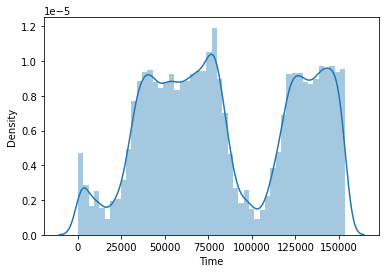

In [ ]:

sns.distplot(df["Time"])

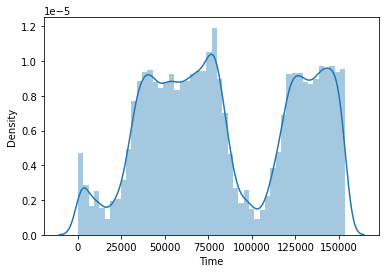

In [ ]:
sns.distplot(df["Time"])


In [ ]:
Y=df["Class"]
X=df.drop(columns="Class",axis=0)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


**standar scaling**

In [ ]:
import sklearn
from sklearn import preprocessing
sc= preprocessing.StandardScaler()


In [ ]:
X_scal=sc.fit_transform(X)
X_scal

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train ,y_test= train_test_split(X_scal , Y,test_size=0.25,random_state=42,stratify=Y)

**Logistic Regression**

In [73]:
from sklearn.metrics import classification_report,f1_score
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
#train the model usif logistic regression 
model.fit(x_train,y_train)
#testing the model 
y_pre=model.predict(x_test)
print(classification_report(y_test,y_pre))
print(f1_score(y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.85      0.63      0.72       123

    accuracy                           1.00     71202
   macro avg       0.92      0.81      0.86     71202
weighted avg       1.00      1.00      1.00     71202

0.719626168224299


**Random Forest Alg**


In [83]:

from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
#train the model usif logistec regression 
model2.fit(x_train,y_train)
#testing the model 
y_pre=model2.predict(x_test)
print(classification_report(y_test,y_pre))
print(f1_score(y_test,y_pre)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.96      0.79      0.87       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

0.8660714285714286


**XGBClassifier**

In [79]:
from xgboost import XGBClassifier
model3=XGBClassifier()
#train the model 
model3.fit(x_train,y_train)
#testing the model 
y_pre=model3.predict(x_test)
print(classification_report(y_test,y_pre))
print(f1_score(y_test,y_pre)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.92      0.77      0.84       123

    accuracy                           1.00     71202
   macro avg       0.96      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202

0.8407079646017699


**Balancing the data**


In [ ]:
from imblearn.over_sampling import SMOTE 
over_sample=SMOTE()
x_smote,y_smote =over_sample.fit_resample(x_train,y_train)
 

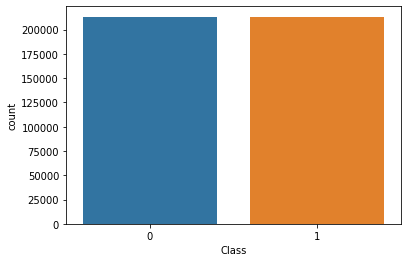

In [72]:
sns.countplot(y_smote)

In [71]:
model.fit(x_smote,y_smote)
#testing the model 
y_pre=model.predict(x_test)
print(classification_report(y_test,y_pre))
print(f1_score(y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.88      0.80      0.84       123

    accuracy                           1.00     71202
   macro avg       0.94      0.90      0.92     71202
weighted avg       1.00      1.00      1.00     71202

0.8376068376068375


In [84]:
model2.fit(x_smote,y_smote)
#testing the model 
y_pre=model2.predict(x_test)
print(classification_report(y_test,y_pre))
print(f1_score(y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.84      0.79      0.82       123

    accuracy                           1.00     71202
   macro avg       0.92      0.89      0.91     71202
weighted avg       1.00      1.00      1.00     71202

0.8151260504201681


In [82]:
#train the model 
model3.fit(x_smote,y_smote)
#testing the model 
y_pre=model3.predict(x_test)
print(classification_report(y_test,y_pre))
print(f1_score(y_test,y_pre)) 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.12      0.89      0.21       123

    accuracy                           0.99     71202
   macro avg       0.56      0.94      0.60     71202
weighted avg       1.00      0.99      0.99     71202

0.20566037735849058


After realizing this small project ,I learned how to use three different techniques used to train the model of classification that predict the fraud credit card.